In [1]:
#https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial/notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('weatherAUS.csv')

In [4]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
47336,2016-04-17,Canberra,9.5,19.9,3.2,NaN,NaN,E,28.0,E,...,57.0,1023.4,1021.0,7.0,8.0,15.5,18.7,Yes,0.0,No
20206,2016-05-10,NorahHead,17.0,23.8,0.6,NaN,NaN,WNW,54.0,NW,...,42.0,1007.9,1005.3,NaN,NaN,20.2,22.6,No,0.2,No
4645,2013-11-06,BadgerysCreek,6.5,27.3,0.0,NaN,NaN,ENE,33.0,NNW,...,29.0,1024.0,1017.4,NaN,NaN,16.2,26.9,No,0.0,No
117580,2017-02-19,PerthAirport,22.9,38.4,0.0,11.0,12.3,E,48.0,ENE,...,36.0,1014.4,1011.3,0.0,1.0,29.6,34.9,No,0.0,No
44941,2009-06-13,Canberra,0.6,11.5,0.0,0.4,6.5,NNW,35.0,N,...,39.0,1019.2,1014.8,7.0,4.0,1.2,9.8,No,0.2,No


In [5]:
df.shape

(142193, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [8]:
df_clean1=df.drop(['Date','Location'],axis=1)

In [9]:
df_clean1.sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
120295,17.6,27.7,0.0,5.2,5.8,NW,30.0,N,WNW,9.0,...,62.0,1016.1,1014.9,5.0,7.0,22.5,23.9,No,10.4,Yes
57204,9.3,26.1,0.0,3.2,NaN,NNE,31.0,E,N,7.0,...,32.0,1026.0,1022.9,1.0,3.0,17.0,25.4,No,0.0,No
95689,11.0,27.1,0.0,6.4,13.8,WSW,28.0,NNE,SW,11.0,...,32.0,1019.9,1016.6,NaN,NaN,17.6,26.0,No,0.0,No


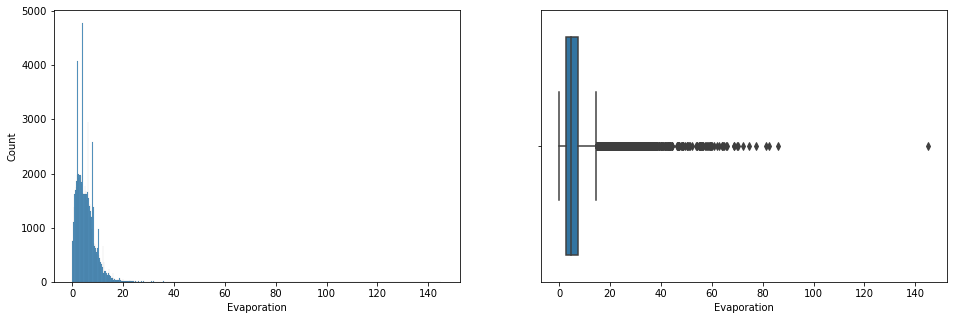

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df_clean1['Evaporation'])

plt.subplot(1,2,2)
sns.boxplot(df_clean1['Evaporation'])
plt.show()

In [11]:
# Finding the IQR
percentile25 = df_clean1['Evaporation'].quantile(0.25)
percentile75 = df_clean1['Evaporation'].quantile(0.75)

In [12]:
iqr = percentile75 - percentile25


In [13]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [14]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)


Upper limit 14.600000000000001
Lower limit -4.600000000000001


In [15]:
df_clean1[df_clean1['Evaporation'] > upper_limit]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5940,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5952,24.9,41.2,0.0,14.8,13.0,SSW,43.0,N,NNW,17.0,...,15.0,1012.9,1010.1,1.0,3.0,31.5,38.1,No,0.0,No
5953,25.2,40.5,0.0,16.4,10.3,SW,44.0,W,SW,13.0,...,15.0,1012.4,1009.0,4.0,6.0,31.4,37.8,No,0.0,No
5954,21.6,34.2,0.0,17.4,13.1,SW,44.0,S,S,17.0,...,8.0,1014.1,1012.3,0.0,0.0,25.0,32.2,No,0.0,No
5955,18.4,31.8,0.0,16.0,12.9,S,33.0,S,SW,17.0,...,5.0,1016.3,1013.8,0.0,1.0,19.9,30.3,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140568,24.8,35.4,31.8,16.8,NaN,SSE,57.0,WNW,WNW,7.0,...,NaN,1010.1,1005.9,3.0,NaN,27.6,NaN,Yes,27.4,Yes
140571,23.0,35.0,79.0,31.0,NaN,ESE,22.0,SSE,SE,11.0,...,NaN,1010.6,1007.1,3.0,NaN,27.5,NaN,Yes,0.0,No
140574,24.5,36.5,0.0,16.0,NaN,ESE,31.0,SSE,ESE,4.0,...,NaN,1008.9,1005.2,5.0,NaN,29.0,NaN,No,0.0,No
140576,24.0,34.0,49.0,17.0,NaN,NNE,31.0,W,NE,7.0,...,NaN,1009.8,1006.0,7.0,NaN,26.0,NaN,Yes,0.0,No


In [16]:
df_clean1[df_clean1['Evaporation'] < lower_limit]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow


In [17]:
df_clean2=df_clean1[df_clean1['Evaporation'] < upper_limit]

In [18]:
df.shape

(142193, 24)

In [19]:
df_clean2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5941,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,NaN,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,0.0,No
5942,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140667,12.4,32.0,0.0,6.4,NaN,SE,41.0,SE,E,13.0,...,NaN,1016.6,1012.3,0.0,NaN,20.3,NaN,No,0.0,No
140668,15.0,32.0,0.0,9.6,NaN,E,35.0,SE,ESE,13.0,...,NaN,1015.9,1012.1,0.0,NaN,21.8,NaN,No,0.0,No
140669,15.4,31.5,0.0,3.6,NaN,ESE,43.0,ESE,ESE,17.0,...,NaN,1016.6,1012.7,0.0,NaN,21.6,NaN,No,0.0,No
140670,12.2,31.5,0.0,4.0,NaN,ESE,37.0,SE,ESE,11.0,...,NaN,1017.1,1012.8,0.0,NaN,19.9,NaN,No,0.0,No


In [20]:
df['Evaporation'].shape

(142193,)

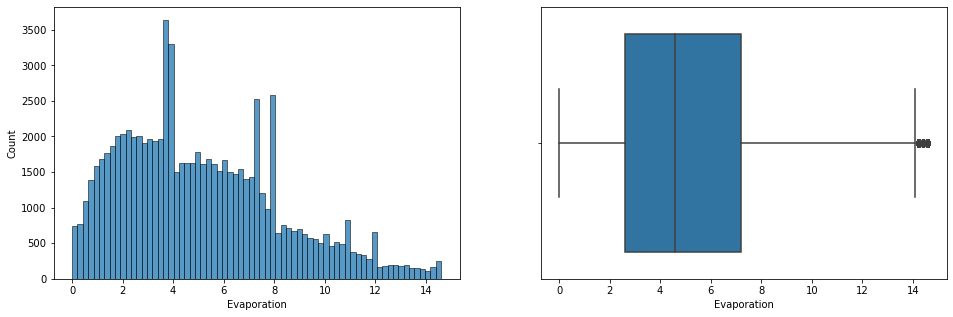

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df_clean2['Evaporation'])

plt.subplot(1,2,2)
sns.boxplot(df_clean2['Evaporation'])
plt.show()